In [46]:
import pandas as pd
from statsmodels.tsa.stattools import coint
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [36]:
price0 = pd.read_csv('R2_day-1.csv',header=0,delimiter=';')
price1 = pd.read_csv('R2_day0.csv',header=0,delimiter=';')
price2 = pd.read_csv('R2_day1.csv',header=0,delimiter=';')

In [37]:
combine_df = pd.concat([price0,price1,price2]).reset_index(drop=True)

In [38]:
combine_df

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
0,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,-1
1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,-1
2,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,-1
3,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,-1
4,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,-1
...,...,...,...,...,...,...,...,...
29998,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,1
29999,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,1
30000,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,1
30001,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,1


In [ ]:
lag_range = -200

results = []

for lag in range(0,lag_range,-10):
    print(lag)
    snapshot_df = pd.concat([combine_df['ORCHIDS'].shift(lag), combine_df['SUNLIGHT']],axis=1).dropna()
    result = coint(snapshot_df['ORCHIDS'], snapshot_df['SUNLIGHT'])
    adf_result = adfuller(snapshot_df['ORCHIDS']/snapshot_df['SUNLIGHT'])
    metrics = {
        'coint_pval': result[1],
        'adf_pval': adf_result[1]
    }
    results.append(metrics)

lag_test_df = pd.DataFrame(results)

# Regression

In [55]:
import statsmodels.api as sm

In [ ]:
X = combine_df[['TRANSPORT_FEES','EXPORT_TARIFF','IMPORT_TARIFF','SUNLIGHT','HUMIDITY']]
y = combine_df['ORCHIDS']
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

In [240]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.086
Date:                Fri, 12 Apr 2024   Prob (F-statistic):             0.0457
Time:                        23:37:17   Log-Likelihood:                -17380.
No. Observations:               23994   AIC:                         3.477e+04
Df Residuals:                   23991   BIC:                         3.479e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4825      0.005     97.508      0.000       0.473       0.492
SUNLIGHT          -0.0024      0.004     -0.586      0.558      -0.010       0.006
Humidity_class    -0.0190      0.009     -2.207      0.027      -0.036      -0.002
==============================================================================
Omnibus:                    82626.936   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3995.010
Skew:                           0.103   Prob(JB):                         0.00
Kurtosis:                       1.012   Cond. No.                         3.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Logistic Regression

In [95]:
import numpy as np

In [105]:

from sklearn.preprocessing import StandardScaler
# Assuming you have your feature matrix X


In [122]:
pd.concat([pd.DataFrame(X_scaled),X['Humidity_class']])

,0,1,2,3,4
0,0.914863,-0.166636,1.137737,-0.309798,-0.003392
1,0.914863,-0.166636,1.137737,-0.310365,-0.002934
2,0.914863,-0.166636,1.137737,-0.310926,-0.002475
3,0.914863,-0.166636,1.137737,-0.311480,-0.002013
4,0.914863,-0.166636,1.137737,-0.312027,-0.001549
...,...,...,...,...,...
29998,1.000000,NaN,NaN,NaN,NaN
29999,1.000000,NaN,NaN,NaN,NaN
30000,1.000000,NaN,NaN,NaN,NaN
30001,1.000000,NaN,NaN,NaN,NaN


In [234]:
from sklearn.linear_model import LogisticRegression

# Assuming you have your feature matrix X and target variable y
model = LogisticRegression()

X = combine_df[['SUNLIGHT','HUMIDITY']][10:]
X['Humidity_class'] = np.where((60<=X['HUMIDITY']) & (X['HUMIDITY']<=80), 1, 0)
X['SUNLIGHT'] = scaler.fit_transform(X[['SUNLIGHT']])

X = X.drop('HUMIDITY',axis=1)

y_raw = combine_df['ORCHIDS']
y = np.where((y_raw-y_raw.shift(10))>0,1,0)[10:]

X_train = X.iloc[:int(len(X)//1.25)]
y_train = y[:int(len(X)//1.25)]
X_test = X.iloc[int(len(X)//1.25):]
y_test = y[int(len(X)//1.25):]

# Assuming you have your feature matrix X and target variable y
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [235]:
model2.coef_

array([[-0.00959122, -0.07629153]])

In [230]:
pd.DataFrame(y_train).value_counts()

0    12613
1    11381
Name: count, dtype: int64

In [233]:
from sklearn.metrics import confusion_matrix

# Assuming you have the true labels (y_true) and predicted labels (y_pred)
cm = confusion_matrix(y_test, model2.predict(X_test))

cm

array([[3126,    0],
       [2873,    0]])

In [232]:
model = sm.Logit(y, sm.add_constant(X))
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.691864
         Iterations 3


In [149]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                29993
Model:                          Logit   Df Residuals:                    29987
Method:                           MLE   Df Model:                            5
Date:                Fri, 12 Apr 2024   Pseudo R-squ.:               0.0006036
Time:                        23:10:27   Log-Likelihood:                -20740.
converged:                       True   LL-Null:                       -20753.
Covariance Type:            nonrobust   LLR p-value:                 0.0001361
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.5100      0.141     -3.624      0.000      -0.786      -0.234
TRANSPORT_FEES     0.0043      0.059      0.072      0.942      -0.111       0.119
EXPORT_TARIFF      0.0303      0.009      3.408      0.001       0.013       0.048
IMPORT_TARIFF     -0.0377      0.014     -2.741      0.006      -0.065      -0.011
SUNLIGHT           0.0295      0.015      2.015      0.044       0.001       0.058
Humidity_class    -0.0319      0.030     -1.080      0.280      -0.090       0.026
==================================================================================
"""

In [155]:
result.params[5]

-0.03192281615874907

In [160]:
def logit(transport_fee, export_tariff, import_tariff, sunlight, humidity_class):
    
    LR_prediction = 1 / (1 + np.exp(-(-0.5100251315069128 + \
                      0.004250729420687619*transport_fee + \
                      0.03026231661161151*export_tariff + \
                      0.037734102007550924*import_tariff + \
                      0.029515887178655463*sunlight + \
                      -0.03192281615874907*humidity_class)))

    return LR_prediction

In [180]:
model.predict(sm.add_constant(X.iloc[0:1,:]))

ValueError: shapes (29993,6) and (1,5) not aligned: 6 (dim 1) != 1 (dim 0)

In [162]:
logit(1.5,9.5,-2,-0.309798,1)

0.4175857595639904

In [163]:
y

array([1, 1, 0, ..., 0, 0, 0])

# Decision Tree

In [262]:
X = combine_df[['TRANSPORT_FEES','EXPORT_TARIFF', 'IMPORT_TARIFF','SUNLIGHT','HUMIDITY']][10:]
X['Humidity_class'] = np.where((60<=X['HUMIDITY']) & (X['HUMIDITY']<=80), 1, 0)
X['SUNLIGHT'] = scaler.fit_transform(X[['SUNLIGHT']])

X = X.drop('HUMIDITY',axis=1)

y_raw = combine_df['ORCHIDS']
y = np.where((y_raw-y_raw.shift(10))>0,1,0)[10:]

X_train = X.iloc[:int(len(X)//1.25)]
y_train = y[:int(len(X)//1.25)]
X_test = X.iloc[int(len(X)//1.25):]
y_test = y[int(len(X)//1.25):]



In [297]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42,max_depth=4)
clf.fit(X_train, y_train)

# # Visualize the decision tree
# fig, ax = plt.subplots(figsize=(12, 12))
# tree.plot_tree(clf, feature_names=X_train.columns, class_names=['0','1'], filled=True)
# plt.show()

DecisionTreeClassifier(max_depth=4, random_state=42)

In [298]:
cm = confusion_matrix(y_test, clf.predict(X_test))
cm

array([[3126,    0],
       [2873,    0]])

In [252]:
import seaborn as sns

<Axes: xlabel='TRANSPORT_FEES', ylabel='Count'>

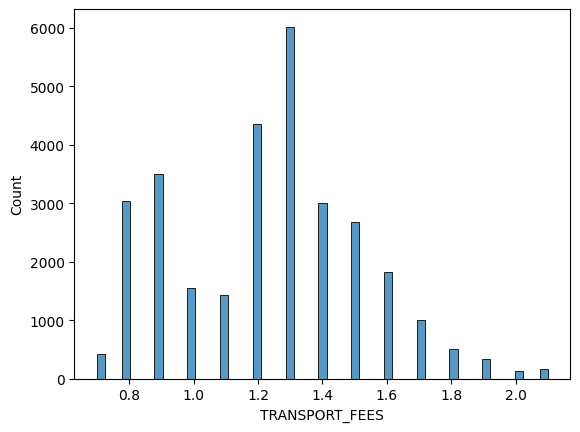

In [302]:
sns.histplot(combine_df['TRANSPORT_FEES'])

# Feature Engineering

In [309]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

In [315]:
class TARIFF_binning(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        X['EXPORT_CLASS'] = np.where(X['EXPORT_TARIFF']>10.5,2,np.where(X['EXPORT_TARIFF']<9.5,0,1))
        X['IMPORT_CLASS'] = np.where(X['IMPORT_TARIFF']<-4,0,1)
        return X

class TRANSPORT_FEE_binning(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        X['TRANSPORT_CLASS'] = np.where(X['TRANSPORT_FEES']>1.5,2,np.where(X['TRANSPORT_FEES']<1.1,0,1))
        return X

class HUMIDITY_binning(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        X['Humidity_CLASS'] = np.where((60<=X['HUMIDITY']) & (X['HUMIDITY']<=80), 1, 0)
        return X

In [350]:
combine_df_1 = combine_df[combine_df['DAY']==1]
orgcols = combine_df_1.columns

baseline_pipeline = Pipeline([
        ('TARIFF_binning', TARIFF_binning()),
        ('TRANSPORT_FEE_binning', TRANSPORT_FEE_binning()),
        ('HUMIDITY_binning', HUMIDITY_binning()),
])
baseline_df = baseline_pipeline.fit_transform(combine_df_1)

/var/folders/fm/rwn89n9x1b94vk3rbr72zvtw0000gn/T/ipykernel_77289/2892885340.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['EXPORT_CLASS'] = np.where(X['EXPORT_TARIFF']>10.5,2,np.where(X['EXPORT_TARIFF']<9.5,0,1))
/var/folders/fm/rwn89n9x1b94vk3rbr72zvtw0000gn/T/ipykernel_77289/2892885340.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['IMPORT_CLASS'] = np.where(X['IMPORT_TARIFF']<-4,0,1)
/var/folders/fm/rwn89n9x1b94vk3rbr72zvtw0000gn/T/ipykernel_77289/2892885340.py:13: SettingWithCopyWarning: 

In [352]:
X_classification = baseline_df.drop(orgcols,axis=1)

In [ ]:
y_raw = combine_df_1['ORCHIDS']

import statistics
def linreg_slope(y):
    x = range(len(y))
    slope, intercept = statistics.linear_regression(x, y)
    return slope
y_slope = y_raw.rolling(20).apply(linreg_slope)

In [347]:
slope_threshold = 0.15

y_byslope = np.where(y_slope > slope_threshold, 2, np.where(y_slope<-slope_threshold, 0,1))

In [348]:
pd.DataFrame(y_byslope).value_counts()

1    4231
0    3008
2    2762
Name: count, dtype: int64

In [362]:
clf2 = DecisionTreeClassifier(random_state=42,max_depth=3)
clf2.fit(X_classification, y_byslope)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [358]:
cm = confusion_matrix(y_byslope, clf2.predict(X_classification))
cm

array([[ 184, 2824,    0],
       [ 141, 4090,    0],
       [ 148, 2614,    0]])

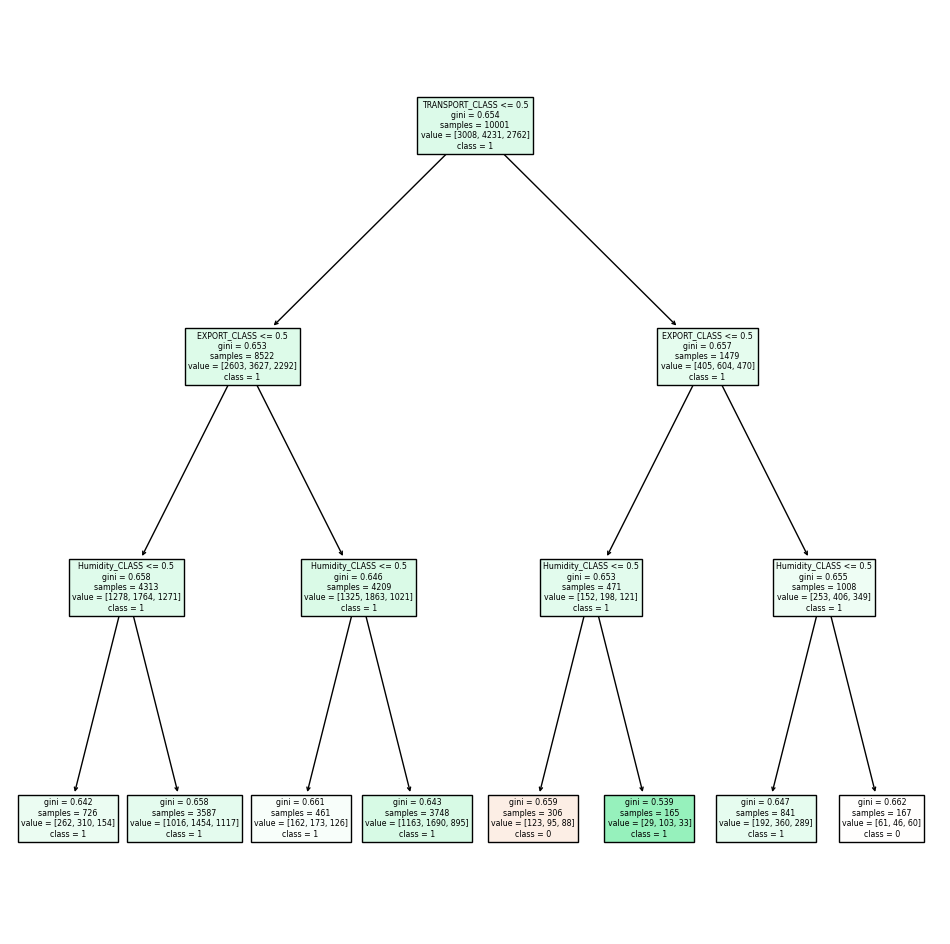

In [359]:
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(clf2, feature_names=X_classification.columns, class_names=['0','1','2'], filled=True)
plt.show()

# Modelling Production DF

In [398]:
def sunlight_unit(X):
    return np.sum(0.0012*X)
# combine_df['SUNLIGHT'][:10000].apply(sunlight_unit,axis=1)
sunlight_df = combine_df['SUNLIGHT'].rolling(10000).apply(sunlight_unit)


In [381]:
# modelling humidity impact on production
humidity_impact = np.where(combine_df['HUMIDITY']>80, 
         ((combine_df['HUMIDITY']-80)//5+1)*2,
          np.where(combine_df['HUMIDITY']<60,((60-combine_df['HUMIDITY'])//5+1)*2,0))

In [467]:
np.convolve(combine_df['SUNLIGHT'], np.repeat(1.0, 10000))

array([2500.    , 4999.4197, 7498.2654, ..., 6899.953 , 4599.984 ,
       2300.    ])

In [683]:
combine_df

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,ask_lower_bound,bid_upper_bound,theoretical_bid,theoretical_ask,production_rate_series
0,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,-1,1188.00,1199.50,1196.00,1204.00,100.0
1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,-1,1190.75,1201.25,1197.75,1205.75,100.0
2,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,-1,1190.75,1201.25,1197.75,1205.75,100.0
3,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,-1,1190.75,1201.25,1197.75,1205.75,100.0
4,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,-1,1190.75,1201.25,1197.75,1205.75,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29998,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,1,1025.85,1032.15,1032.25,1040.25,100.0
29999,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,1,1025.85,1032.15,1032.25,1040.25,100.0
30000,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,1,1025.85,1032.15,1032.25,1040.25,100.0
30001,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,1,1023.85,1030.15,1030.25,1038.25,100.0


In [712]:
def generate_production_rates1(sunlight, humidity,window = 10000):

    weights = np.repeat(1.0, window)
    convolution_product = np.convolve(sunlight, weights)
    partial_divisor = np.convolve(np.ones(len(sunlight)), weights)

    rolling_sunlight = convolution_product / partial_divisor

    sufficient_sunlight = [ (1 if s >= 2500 else 0) for s in sunlight]

    production = []
    shaded = 0
    
    for i in range(len(sunlight)):

        current_term = 100
        discount = 0

        if i != 0:
            # if sum(sufficient_sunlight[(i-window if i-window > 0 else 0):i])/len(sufficient_sunlight[(i-window if i-window > 0 else 0):i]) < 7 / 12:
            #     shaded += 1
            # else:
            #     shaded = 0

            if rolling_sunlight[i] < 1850:
                shaded += 1
            else:
                shaded = 0

        # if shaded > 140:
        discount += 4 * (shaded // 140)

        if humidity[i] < 60:
            discount += (2) * ((60 - humidity[i])/5)

        if humidity[i] > 80:
             discount += (2) * ((humidity[i] - 80)/5)

        if discount <= 0:
            production.append(current_term)
        else:
            production.append(current_term - discount if current_term - discount > 0 else 0)

    return production

In [703]:
def generate_production_rates2(sunlight, humidity,window = 10000):

    weights = np.repeat(1.0, window)
    convolution_product = np.convolve(sunlight, weights)
    partial_divisor = np.convolve(np.ones(len(sunlight)), weights)

    rolling_sunlight = convolution_product / partial_divisor

    sufficient_sunlight = [ (1 if s >= 2500 else 0) for s in sunlight]
    print(sufficient_sunlight)

    production = []
    shaded = 0
    
    for i in range(len(sunlight)):

        current_term = 100
        discount = 0

        if i != 0:
            # if sum(sufficient_sunlight[(i-window if i-window > 0 else 0):i])/len(sufficient_sunlight[(i-window if i-window > 0 else 0):i]) < 7 / 12:
            #     shaded += 1
            # else:
            #     shaded = 0

            if rolling_sunlight[i] < 1800:
                shaded += 1
            else:
                shaded = 0

        
        
        # if i % 1000 == 0:
        #     print(i, shaded)

        # if shaded > 0:
        #     discount += 4 * (shaded / 140)

        if rolling_sunlight[i] < 2916:
            discount += (4) * (2916 - rolling_sunlight[i]) / (10000/72)

        if humidity[i] < 60:
            discount += (2) * ((60 - humidity[i])/5)

        if humidity[i] > 80:
             discount += (2) * ((humidity[i] - 80)/5)

        if discount <= 0:
            production.append(current_term)
        else:
            production.append(current_term - discount if current_term - discount > 0 else 0)

    return production

In [ ]:
production_rate_series = generate_production_rates(combine_df['SUNLIGHT'], combine_df['HUMIDITY'])

In [ ]:
timestamp: 5 -> insufficient sunlight
production series:
[96,96,96,96,96,96,...,96,96,96]
[99.99,99.98,...,96.1,96]

timestamp: 6 -> sufficient sunlight
production series:
[96] <- pop [96,96,96,96,96,...,96,96,96] <- append [100]
new production series:
[96,96,96,96,96,...,96,96,100]

In [782]:
a = list(bin(int('ca',16))[2:])
hex(int(''.join(a),2))[2:]

'ca'

In [839]:
bin_testing = '0000000101'

# test_hex = '00ca'

hd = (len(bin_testing) + 3)// 4
hex_num = '%.*x' % (hd, int('0b'+bin_testing, 0))

return_bin = bin(int(hex_num, 16))[2:].zfill(len(hex_num)*4)
# sunlight_ts_bin = bin(int(test_hex, 16))[2:]

# return_hex = hex(int(''.join(sunlight_ts_bin),2))[2:]

In [847]:

# Binary to Hexadecimal
binary_number = '000011110000'

# Convert binary to hexadecimal
hexadecimal_number = format(int(binary_number, 2), '0>4X')

print(hexadecimal_number)

# Convert hexadecimal to binary
bin2 = format(int(hexadecimal_number, 16), '0>12b')

print(bin2)  # Output: 000011110000

00F0
000011110000


In [856]:
sufficient_sunlight_day1 = [('1' if s >= 2500 else '0') for s in combine_df[combine_df['DAY']==1]['SUNLIGHT']]
sufficient_sunlight_day1_bin = ''.join(sufficient_sunlight_day1)[1:]
# hex_num = hex(int(''.join(sufficient_sunlight_day1),2)).zfill((len(sufficient_sunlight_day1_bin) + 3) // 4)

hd = (len(sufficient_sunlight_day1_bin) + 3)// 4
hex_num = '%.*x' % (hd, int('0b'+sufficient_sunlight_day1_bin, 0))

return_bin = bin(int(hex_num, 16))[2:].zfill(len(hex_num)*4)

In [ ]:
sufficient_sunlight_day1_bin

In [830]:
return_bin == sufficient_sunlight_day1_bin

False

In [834]:
len(return_bin)

10004

In [821]:
sufficient_sunlight_day1_bin == return_bin

False

In [880]:
np.sum([0,1,0,1])

2

In [911]:
def generate_production_rates4(sunlight, humidity,window = 10000):
    sunlight_series = list(combine_df[combine_df['DAY']==-1]['SUNLIGHT'])
    production_series = []
    insufficient_sunlight_tracker = 0
    
    sufficient_sunlight = [ (1 if s >= 2500 else 0) for s in sunlight_series]
    
    for i in range(len(sunlight)):
        popped = sufficient_sunlight.pop(0)
        # print(f'Before, {np.sum(sufficient_sunlight)},popped {popped}')
        
        if sunlight[i] > 2500:
            sufficient_sunlight.append(1)
            
        else:
            sufficient_sunlight.append(0)

        # print('After',np.sum(sufficient_sunlight))
        if (np.sum(sufficient_sunlight))/len(sufficient_sunlight) > 7/12:
            # sufficient sunlight
            insufficient_sunlight_tracker = max(0, insufficient_sunlight_tracker - 1)
        else:
            insufficient_sunlight_tracker = 140

        discount = 0
        if insufficient_sunlight_tracker > 0:
            discount += 4
        
        if humidity[i] < 60:
            discount += (2) * ((60 - humidity[i])//5 + 1)

        if humidity[i] > 80:
            discount += (2) * ((humidity[i] - 80)//5 + 1)



        production_series.append(max(100-discount,0))

    return production_series

In [912]:
combine_df['production_rate_series4'] = [0]*10001 + generate_production_rates4(list(combine_df[combine_df['DAY'].isin([0,1])]['SUNLIGHT']),
                                                                   list(combine_df[combine_df['DAY'].isin([0,1])]['HUMIDITY']))

In [916]:
def generate_production_rates5(sunlight, humidity,window = 10000):
    sunlight_series = list(combine_df[combine_df['DAY']==-1]['SUNLIGHT'])
    production_series = []
    insufficient_sunlight_tracker = 0
    
    sufficient_sunlight = [ (1 if s >= 2500 else 0) for s in sunlight_series]
    
    for i in range(len(sunlight)):
        if sunlight[i] > 2500:
            insufficient_sunlight_tracker = max(0, insufficient_sunlight_tracker - 1)

        else:
            insufficient_sunlight_tracker = 140
            
        # if (np.sum(sufficient_sunlight)) > 7/12:
        #     # sufficient sunlight
        #     insufficient_sunlight_tracker = max(0, insufficient_sunlight_tracker - 1)
        # else:
        #     insufficient_sunlight_tracker = 140

        discount = 0
        if insufficient_sunlight_tracker > 0:
            discount += 4
        
        if humidity[i] < 60:
            discount += (2) * ((60 - humidity[i])//5 + 1)

        if humidity[i] > 80:
            discount += (2) * ((humidity[i] - 80)//5 + 1)


        production_series.append(max(100-discount,0))

    return production_series

In [866]:
def generate_production_rates6(sunlight, humidity,window = 10000):

    weights = np.repeat(1.0, window)
    convolution_product = np.convolve(sunlight, weights)
    partial_divisor = np.convolve(np.ones(len(sunlight)), weights)

    rolling_sunlight = convolution_product / partial_divisor

    sufficient_sunlight = [ (1 if s >= 2500 else 0) for s in sunlight]

    production = []
    shaded = 0
    
    for i in range(len(sunlight)):

        current_term = 100
        discount = 0

        if i != 0:
            # if sum(sufficient_sunlight[(i-window if i-window > 0 else 0):i])/len(sufficient_sunlight[(i-window if i-window > 0 else 0):i]) < 7 / 12:
            #     shaded += 1
            # else:
            #     shaded = 0

            if rolling_sunlight[i] < 1800:
                shaded += 1
            else:
                shaded = 0

        

        # if shaded > 0:
        #     discount += 4 * (shaded / 140)

        if sunlight[i] < 2556:
            discount += (24) * (2556 - sunlight[i]) / 365

        if humidity[i] < 60:
            discount += (2) * ((60 - humidity[i])/5)

        if humidity[i] > 80:
             discount += (2) * ((humidity[i] - 80)/5)

        if discount <= 0:
            production.append(current_term)
        else:
            production.append(current_term - discount if current_term - discount > 0 else 0)

    return production

In [871]:
def generate_production_rates7(sunlight, humidity,window = 10000):
    sunlight_series = list(combine_df[combine_df['DAY']==-1]['SUNLIGHT'])
    production_series = []
    insufficient_sunlight_tracker = 0
    
    sufficient_sunlight = [ (1 if s >= 2500 else 0) for s in sunlight_series]
    
    for i in range(len(sunlight)):
        if sunlight[i] > 2500:
            insufficient_sunlight_tracker = max(0, insufficient_sunlight_tracker - 1)

        else:
            insufficient_sunlight_tracker = 140
            
        # if (np.sum(sufficient_sunlight)) > 7/12:
        #     # sufficient sunlight
        #     insufficient_sunlight_tracker = max(0, insufficient_sunlight_tracker - 1)
        # else:
        #     insufficient_sunlight_tracker = 140

        discount = 0
        if humidity[i] < 60:
            discount += (2) * ((60 - humidity[i])//5 + 1)

        if humidity[i] > 80:
            discount += (2) * ((humidity[i] - 80)//5 + 1)


        production_series.append(max(100-discount,0))

    return production_series

In [872]:
combine_df['production_rate_series7'] = generate_production_rates7(list(combine_df[combine_df['DAY'].isin([-1,0,1])]['SUNLIGHT']),
                                                                   list(combine_df[combine_df['DAY'].isin([-1,0,1])]['HUMIDITY']))

In [867]:
combine_df['production_rate_series6'] = generate_production_rates6(list(combine_df[combine_df['DAY'].isin([-1,0,1])]['SUNLIGHT']),
                                                                   list(combine_df[combine_df['DAY'].isin([-1,0,1])]['HUMIDITY']))

In [860]:
combine_df['production_rate_series5'] = generate_production_rates5(list(combine_df[combine_df['DAY'].isin([-1,0,1])]['SUNLIGHT']),
                                                                   list(combine_df[combine_df['DAY'].isin([-1,0,1])]['HUMIDITY']))

In [ ]:
combine_df['production_rate_series4'] = [0]*10001 + generate_production_rates4(list(combine_df[combine_df['DAY'].isin([0,1])]['SUNLIGHT']),
                                                                   list(combine_df[combine_df['DAY'].isin([0,1])]['HUMIDITY']))

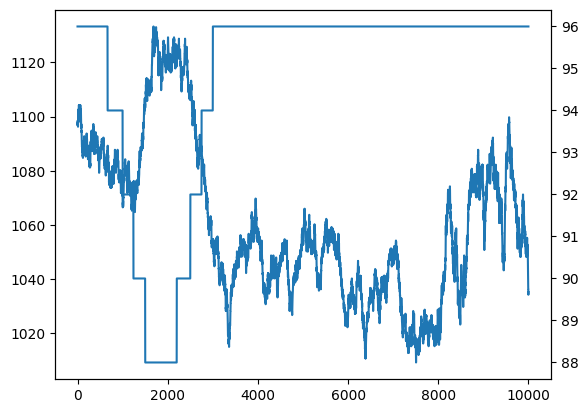

In [917]:
fig, ax1 = plt.subplots()

ax1.plot(range(len(combine_df[combine_df['DAY']==1]['ORCHIDS'])), 
         combine_df[combine_df['DAY']==1]['ORCHIDS'])
ax2 = ax1.twinx()
ax2.plot(range(len(combine_df[combine_df['DAY']==1]['production_rate_series4'])), 
         combine_df[combine_df['DAY']==1]['production_rate_series4'])

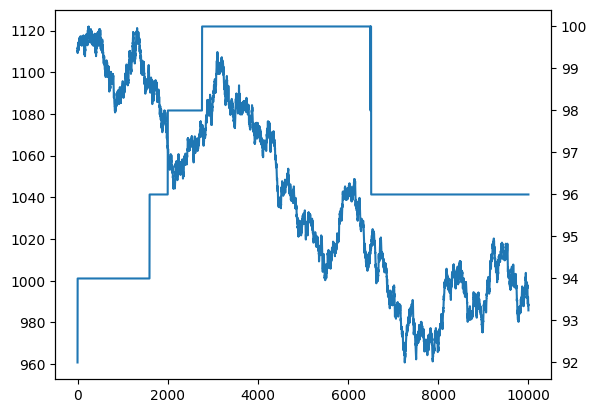

In [914]:
fig, ax1 = plt.subplots()

ax1.plot(range(len(combine_df[combine_df['DAY']==0]['ORCHIDS'])), 
         combine_df[combine_df['DAY']==0]['ORCHIDS'])
ax2 = ax1.twinx()
ax2.plot(range(len(combine_df[combine_df['DAY']==0]['production_rate_series4'])), 
         combine_df[combine_df['DAY']==0]['production_rate_series4'])

In [529]:
demand_series = - combine_df['TRANSPORT_FEES'] - combine_df['IMPORT_TARIFF'] - combine_df['EXPORT_TARIFF']

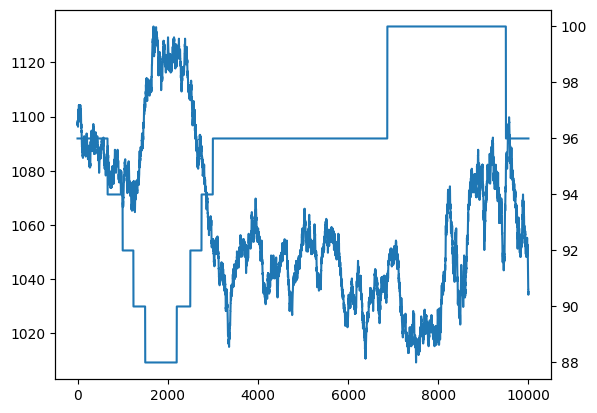

In [862]:
fig, ax1 = plt.subplots()

ax1.plot(range(len(combine_df[combine_df['DAY']==1]['ORCHIDS'])), 
         combine_df[combine_df['DAY']==1]['ORCHIDS'])
ax2 = ax1.twinx()
ax2.plot(range(len(combine_df[combine_df['DAY']==1]['production_rate_series5'])), 
         combine_df[combine_df['DAY']==1]['production_rate_series5'])

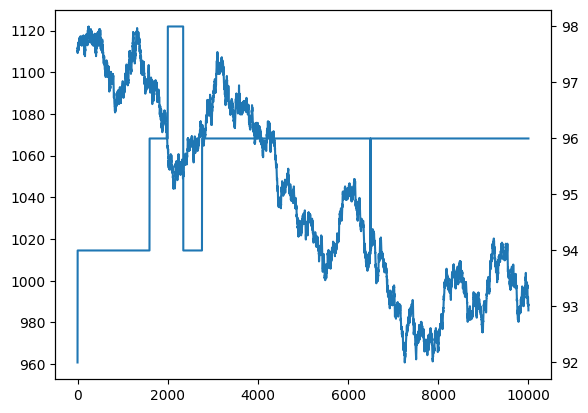

In [863]:
fig, ax1 = plt.subplots()

ax1.plot(range(len(combine_df[combine_df['DAY']==0]['ORCHIDS'])), 
         combine_df[combine_df['DAY']==0]['ORCHIDS'])
ax2 = ax1.twinx()
ax2.plot(range(len(combine_df[combine_df['DAY']==0]['production_rate_series5'])), 
         combine_df[combine_df['DAY']==0]['production_rate_series5'])

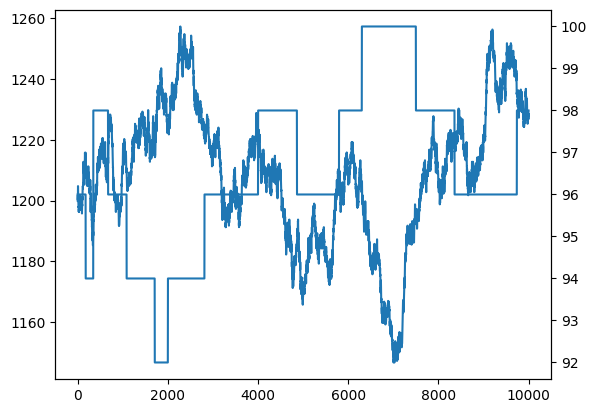

In [864]:
fig, ax1 = plt.subplots()

ax1.plot(range(len(combine_df[combine_df['DAY']==-1]['ORCHIDS'])), 
         combine_df[combine_df['DAY']==-1]['ORCHIDS'])
ax2 = ax1.twinx()
ax2.plot(range(len(combine_df[combine_df['DAY']==-1]['production_rate_series5'])), 
         combine_df[combine_df['DAY']==-1]['production_rate_series5'])

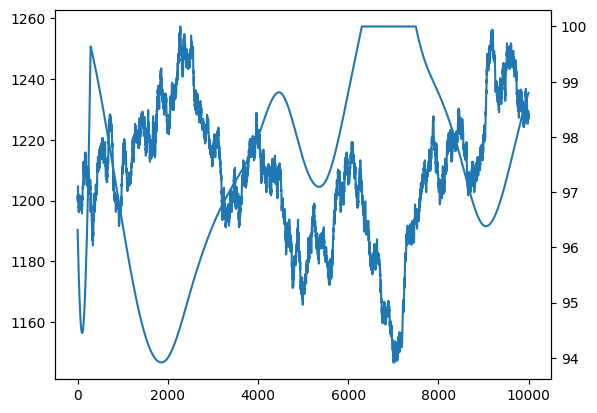

In [868]:
fig, ax1 = plt.subplots()

ax1.plot(range(len(combine_df[combine_df['DAY']==-1]['ORCHIDS'])), 
         combine_df[combine_df['DAY']==-1]['ORCHIDS'])
ax2 = ax1.twinx()
ax2.plot(range(len(combine_df[combine_df['DAY']==-1]['production_rate_series6'])), 
         combine_df[combine_df['DAY']==-1]['production_rate_series6'])

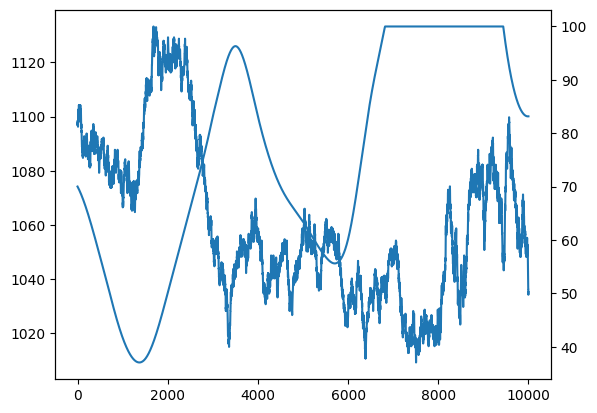

In [869]:
fig, ax1 = plt.subplots()

ax1.plot(range(len(combine_df[combine_df['DAY']==1]['ORCHIDS'])), 
         combine_df[combine_df['DAY']==1]['ORCHIDS'])
ax2 = ax1.twinx()
ax2.plot(range(len(combine_df[combine_df['DAY']==1]['production_rate_series6'])), 
         combine_df[combine_df['DAY']==1]['production_rate_series6'])

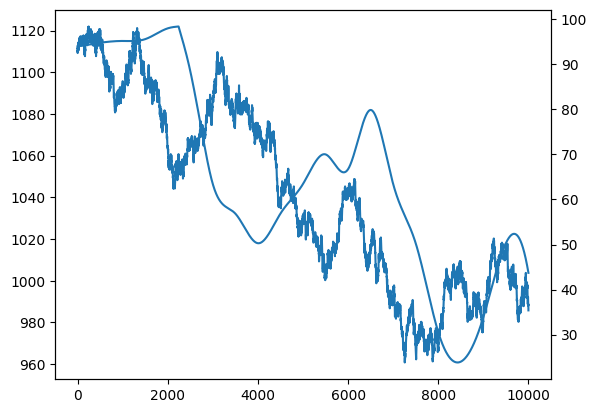

In [870]:
fig, ax1 = plt.subplots()

ax1.plot(range(len(combine_df[combine_df['DAY']==0]['ORCHIDS'])), 
         combine_df[combine_df['DAY']==0]['ORCHIDS'])
ax2 = ax1.twinx()
ax2.plot(range(len(combine_df[combine_df['DAY']==0]['production_rate_series6'])), 
         combine_df[combine_df['DAY']==0]['production_rate_series6'])

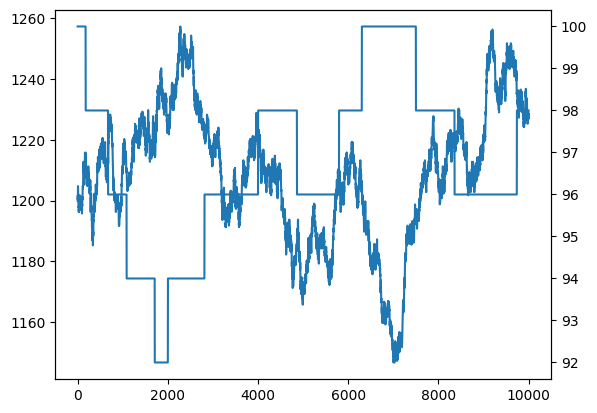

In [873]:
fig, ax1 = plt.subplots()

ax1.plot(range(len(combine_df[combine_df['DAY']==-1]['ORCHIDS'])), 
         combine_df[combine_df['DAY']==-1]['ORCHIDS'])
ax2 = ax1.twinx()
ax2.plot(range(len(combine_df[combine_df['DAY']==-1]['production_rate_series7'])), 
         combine_df[combine_df['DAY']==-1]['production_rate_series7'])

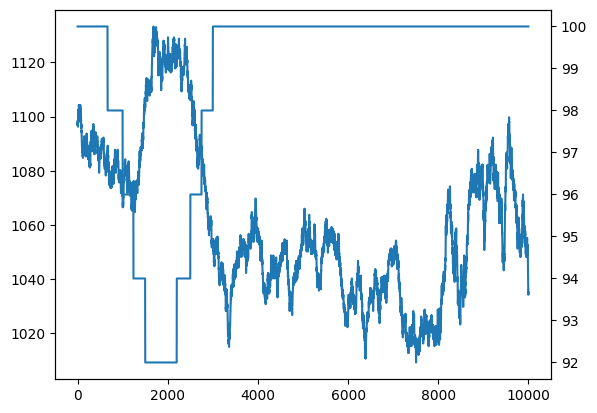

In [874]:
fig, ax1 = plt.subplots()

ax1.plot(range(len(combine_df[combine_df['DAY']==1]['ORCHIDS'])), 
         combine_df[combine_df['DAY']==1]['ORCHIDS'])
ax2 = ax1.twinx()
ax2.plot(range(len(combine_df[combine_df['DAY']==1]['production_rate_series7'])), 
         combine_df[combine_df['DAY']==1]['production_rate_series7'])

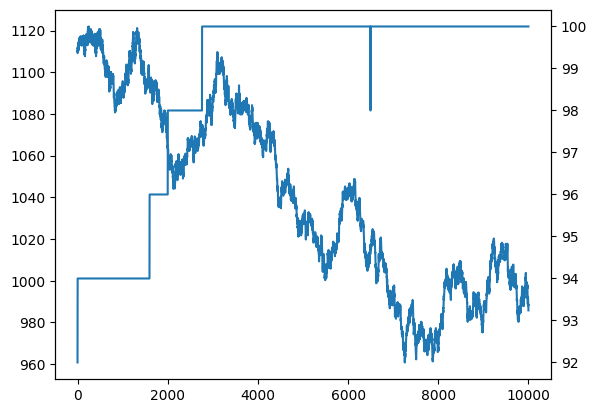

In [875]:
fig, ax1 = plt.subplots()

ax1.plot(range(len(combine_df[combine_df['DAY']==0]['ORCHIDS'])), 
         combine_df[combine_df['DAY']==0]['ORCHIDS'])
ax2 = ax1.twinx()
ax2.plot(range(len(combine_df[combine_df['DAY']==0]['production_rate_series7'])), 
         combine_df[combine_df['DAY']==0]['production_rate_series7'])

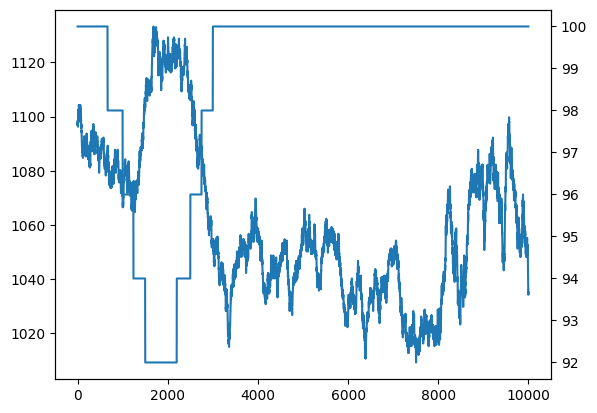

In [922]:
fig, ax1 = plt.subplots()

ax1.plot(range(len(combine_df[combine_df['DAY']==1]['ORCHIDS'])), 
         combine_df[combine_df['DAY']==1]['ORCHIDS'])
ax2 = ax1.twinx()
ax2.plot(range(len(combine_df[combine_df['DAY']==1]['production_rate_series7'])), 
         combine_df[combine_df['DAY']==1]['production_rate_series7'])

In [931]:
def generate_production_rates8(sunlight, humidity,window = 10000):
    sunlight_series = list(combine_df[combine_df['DAY']==-1]['SUNLIGHT'])
    production_series = []
    insufficient_sunlight_tracker = 0
        
    for i in range(len(sunlight)):
        sunlight_series.pop(0)
        sunlight_series.append(sunlight[i])
        
        if np.sum(sunlight_series) < 2500*7*140:
            insufficient_sunlight_tracker = max(0, insufficient_sunlight_tracker - 1)
        else:
            insufficient_sunlight_tracker = 140
            
        # if (np.sum(sufficient_sunlight)) > 7/12:
        #     # sufficient sunlight
        #     insufficient_sunlight_tracker = max(0, insufficient_sunlight_tracker - 1)
        # else:
        #     insufficient_sunlight_tracker = 140

        discount = 0
        if humidity[i] < 60:
            discount += (2) * ((60 - humidity[i])//5 + 1)

        if humidity[i] > 80:
            discount += (2) * ((humidity[i] - 80)//5 + 1)


        production_series.append(max(100-discount,0))

    return production_series

In [932]:
combine_df['production_rate_series8'] = [0]*10001 + generate_production_rates8(list(combine_df[combine_df['DAY'].isin([0,1])]['SUNLIGHT']),
                                                                   list(combine_df[combine_df['DAY'].isin([0,1])]['HUMIDITY']))

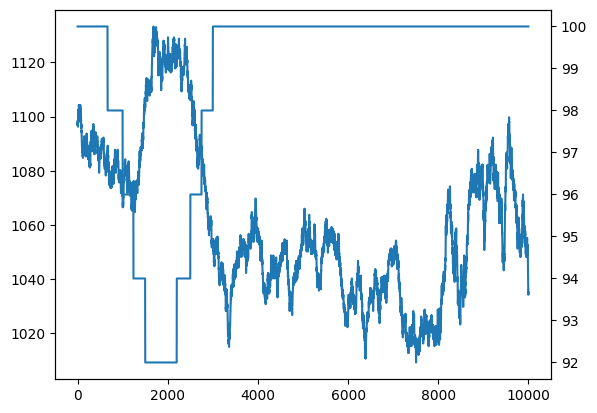

In [933]:
fig, ax1 = plt.subplots()

ax1.plot(range(len(combine_df[combine_df['DAY']==1]['ORCHIDS'])), 
         combine_df[combine_df['DAY']==1]['ORCHIDS'])
ax2 = ax1.twinx()
ax2.plot(range(len(combine_df[combine_df['DAY']==1]['production_rate_series8'])), 
         combine_df[combine_df['DAY']==1]['production_rate_series8'])

# Regression on Production rate and price

In [518]:
combine_df['ORCHIDS'].pct_change()[10000:]*100

10000    0.000000
10001   -9.466612
10002    0.000000
10003   -0.179897
10004   -0.045055
           ...   
29998   -0.240674
29999    0.000000
30000    0.000000
30001   -0.193004
30002    0.096688
Name: ORCHIDS, Length: 20003, dtype: float64

In [537]:
(combine_df['ORCHIDS'].shift(-10) - combine_df['ORCHIDS'])[10000:29991]

10000   -116.25
10001      1.50
10002      1.25
10003      4.50
10004      1.50
          ...  
29986    -10.00
29987    -11.25
29988    -12.50
29989    -12.00
29990     -9.00
Name: ORCHIDS, Length: 19991, dtype: float64

In [542]:
combine_df['ORCHIDS'].shift(1)

0            NaN
1        1200.00
2        1201.75
3        1201.75
4        1201.75
          ...   
29998    1038.75
29999    1036.25
30000    1036.25
30001    1036.25
30002    1034.25
Name: ORCHIDS, Length: 30003, dtype: float64

In [688]:
i = 100
X = pd.concat([pd.Series(production_rate_series),combine_df['TRANSPORT_FEES'], combine_df['IMPORT_TARIFF'], combine_df['EXPORT_TARIFF']],axis=1)[10000:30001-i]
# X = production_rate_series[10000:]
y = combine_df['ORCHIDS'].shift(-i)[10000:30001-i]
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

In [689]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ORCHIDS   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     744.8
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:49:08   Log-Likelihood:                -99789.
No. Observations:               19901   AIC:                         1.996e+05
Df Residuals:                   19896   BIC:                         1.996e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1122.1125      5.603    200.282      0.000    1111.131    1133.094
0                 -1.0508      0.044    -23.946      0.000      -1.137      -0.965
TRANSPORT_FEES   -25.9162      1.278    -20.283      0.000     -28.421     -23.412
IMPORT_TARIFF      5.9114      0.433     13.637      0.000       5.062       6.761
EXPORT_TARIFF      7.3832      0.205     36.049      0.000       6.982       7.785
==============================================================================
Omnibus:                     1748.818   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              602.020
Skew:                           0.149   Prob(JB):                    1.88e-131
Kurtosis:                       2.202   Cond. No.                     1.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [577]:
results.params

const             2588.437196
0                  -15.328297
TRANSPORT_FEES     -72.137611
IMPORT_TARIFF        3.567693
EXPORT_TARIFF        8.050881
dtype: float64

# Modelling

In [695]:
# Assume that arbitrage do not exist

combine_df['ask_lower_bound'] = combine_df['ORCHIDS'] - combine_df['EXPORT_TARIFF'] - combine_df['TRANSPORT_FEES']
combine_df['bid_upper_bound'] = combine_df['ORCHIDS'] + combine_df['IMPORT_TARIFF'] + combine_df['TRANSPORT_FEES']

In [696]:
# base on observation, bid ask spead is around 7-8 revolving around orchids mid price
combine_df['theoretical_bid'] = combine_df['ORCHIDS'] - 4
combine_df['theoretical_ask'] = combine_df['ORCHIDS'] + 4

combine_df['production_rate_series'] = production_rate_series

In [705]:
analysis_timeframe = combine_df[(combine_df['DAY']==1) & (combine_df['timestamp']>100000) & (combine_df['timestamp']<200000)]

In [ ]:
# binary_conversion -> to deal with the problem of too large data

In [637]:
analysis_timeframe

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,ask_lower_bound,bid_upper_bound,theoretical_bid,theoretical_ask,production_rate_series
21003,100100,1069.50,1.1,8.5,-5.5,1699.7579,85.018750,1,1059.90,1065.10,1065.50,1073.50,97.992500
21004,100200,1068.25,1.1,8.5,-5.5,1699.5168,85.037530,1,1058.65,1063.85,1064.25,1072.25,97.984988
21005,100300,1066.75,1.1,8.5,-5.5,1699.2767,85.056340,1,1057.15,1062.35,1062.75,1070.75,97.977464
21006,100400,1066.50,1.1,8.5,-5.5,1699.0376,85.075180,1,1056.90,1062.10,1062.50,1070.50,97.969928
21007,100500,1068.25,1.1,8.5,-5.5,1698.7993,85.094055,1,1058.65,1063.85,1064.25,1072.25,97.962378
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21997,199500,1121.75,1.3,12.5,-5.5,1897.7595,97.031720,1,1107.95,1117.55,1117.75,1125.75,93.187312
21998,199600,1121.75,1.3,12.5,-5.5,1898.2080,97.025460,1,1107.95,1117.55,1117.75,1125.75,93.189816
21999,199700,1121.75,1.3,12.5,-5.5,1898.6564,97.019160,1,1107.95,1117.55,1117.75,1125.75,93.192336
22000,199800,1121.25,1.3,12.5,-5.5,1899.1045,97.012810,1,1107.45,1117.05,1117.25,1125.25,93.194876


<Axes: >

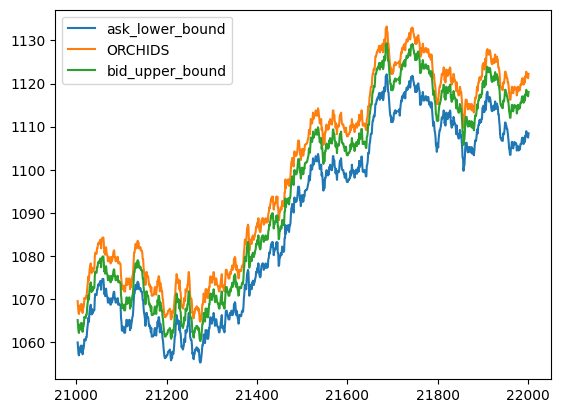

In [636]:
analysis_timeframe[['ask_lower_bound','ORCHIDS', 'bid_upper_bound']].plot()

<Axes: >

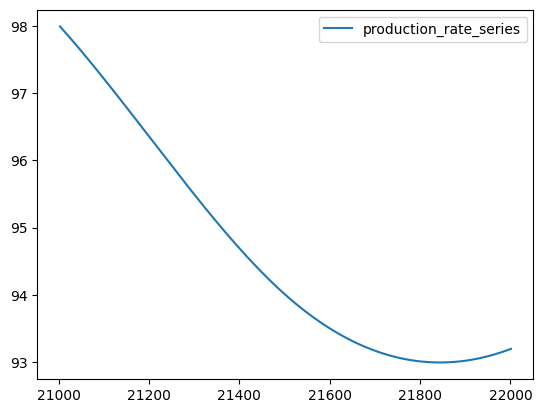

In [639]:
analysis_timeframe[['production_rate_series']].plot()

In [694]:
analysis_timeframe2 = combine_df[(combine_df['DAY']==1) & (combine_df['timestamp']>200000) & (combine_df['timestamp']<300000)]

<Axes: >

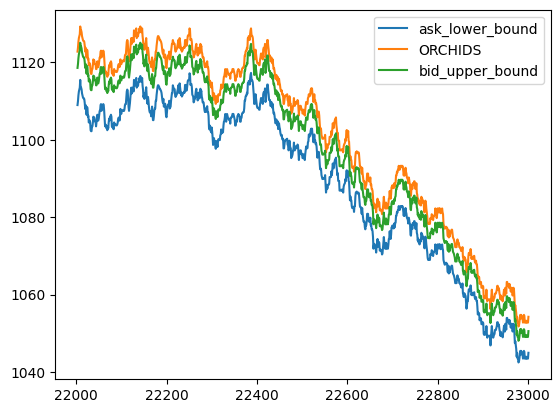

In [641]:
analysis_timeframe2[['ask_lower_bound','ORCHIDS', 'bid_upper_bound']].plot()

<Axes: >

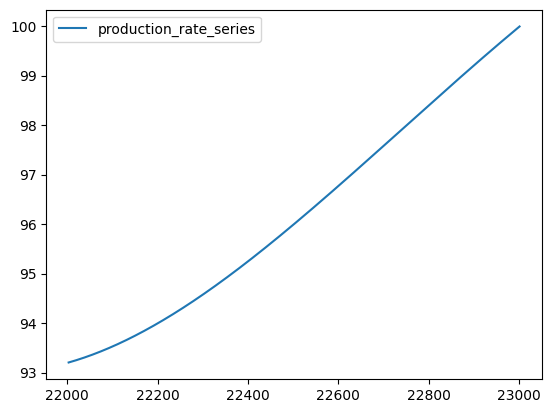

In [698]:
analysis_timeframe2[['production_rate_series']].plot()

In [ ]:
timestamp 
-> next 10 minutes, -4% production

In [ ]:
1 timestamp -> 4.32 seconds
10 minutes ~ 140 length

[x,x,x,x..,x,x] <- 140 length

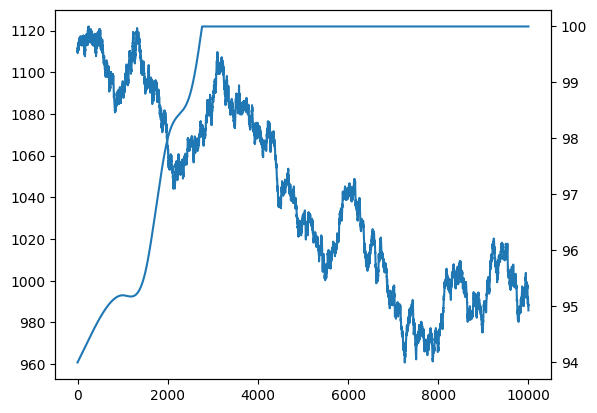

In [652]:
fig, ax1 = plt.subplots()

ax1.plot(range(len(combine_df[combine_df['DAY']==0]['ORCHIDS'])), 
         combine_df[combine_df['DAY']==0]['ORCHIDS'])
ax2 = ax1.twinx()
ax2.plot(range(len(combine_df[combine_df['DAY']==0]['production_rate_series'])), 
         combine_df[combine_df['DAY']==0]['production_rate_series'])

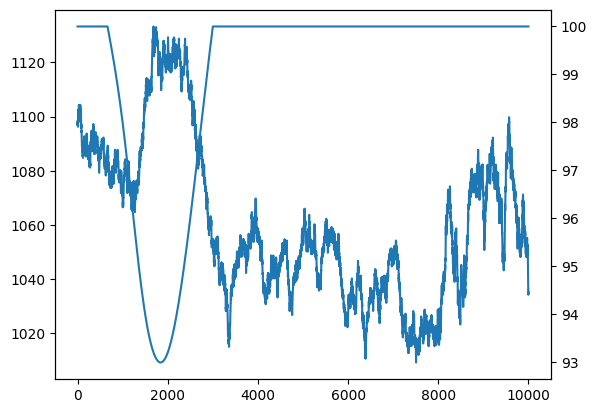

In [653]:
fig, ax1 = plt.subplots()

ax1.plot(range(len(combine_df[combine_df['DAY']==1]['ORCHIDS'])), 
         combine_df[combine_df['DAY']==1]['ORCHIDS'])
ax2 = ax1.twinx()
ax2.plot(range(len(combine_df[combine_df['DAY']==1]['production_rate_series'])), 
         combine_df[combine_df['DAY']==1]['production_rate_series'])

generate_production_series

At timestamp = 12000 
Historical sunlight -> predict the next 140 timestamp

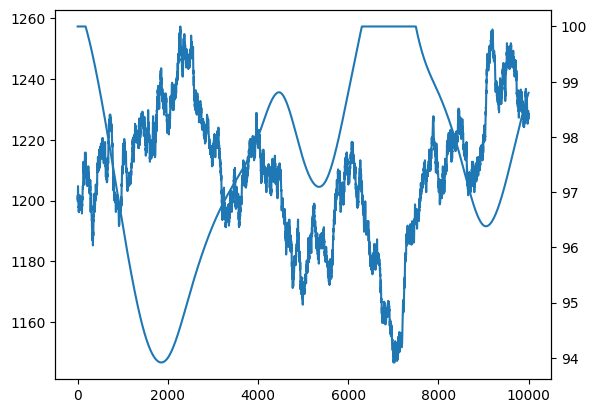

In [654]:
fig, ax1 = plt.subplots()

ax1.plot(range(len(combine_df[combine_df['DAY']==-1]['ORCHIDS'])), 
         combine_df[combine_df['DAY']==-1]['ORCHIDS'])
ax2 = ax1.twinx()
ax2.plot(range(len(combine_df[combine_df['DAY']==-1]['production_rate_series'])), 
         combine_df[combine_df['DAY']==-1]['production_rate_series'])

In [ ]:
timestamp -> 1000000
All information of sunlight from 0-1000000
-> you can get production data 1000000-(1000000+140)

In [675]:
sufficient_sunlight = [ (1 if s >= 2500 else 0) for s in analysis_timeframe2['SUNLIGHT']]
01010010101010101101 -> base 10 -> binary 2 -> base 10

In [ ]:
timestamp: 5 -> insufficient sunlight
production series:
[96,96,96,96,96,96,...,96,96,96]
[99.99,99.98,...,96.1,96]

timestamp: 6 -> sufficient sunlight
production series:
[96] <- pop [96,96,96,96,96,...,96,96,96] <- append [100]
new production series:
[96,96,96,96,96,...,96,96,100]

In [656]:
analysis_timeframe2['production_rate_series']

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,ask_lower_bound,bid_upper_bound,theoretical_bid,theoretical_ask,production_rate_series
22003,200100,1122.75,1.3,12.5,-5.5,1900.4474,96.993540,1,1108.95,1118.55,1118.75,1126.75,93.202584
22004,200200,1123.75,1.3,12.5,-5.5,1900.8947,96.987030,1,1109.95,1119.55,1119.75,1127.75,93.205188
22005,200300,1125.25,1.3,12.5,-5.5,1901.3416,96.980484,1,1111.45,1121.05,1121.25,1129.25,93.207806
22006,200400,1126.25,1.3,12.5,-5.5,1901.7883,96.973900,1,1112.45,1122.05,1122.25,1130.25,93.210440
22007,200500,1126.75,1.3,12.5,-5.5,1902.2349,96.967280,1,1112.95,1122.55,1122.75,1130.75,93.213088
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22997,299500,1052.75,0.8,8.5,-4.5,2297.4685,80.094950,1,1043.45,1049.05,1048.75,1056.75,99.962020
22998,299600,1052.75,0.8,8.5,-4.5,2297.9734,80.075935,1,1043.45,1049.05,1048.75,1056.75,99.969626
22999,299700,1052.75,0.8,8.5,-4.5,2298.4790,80.056940,1,1043.45,1049.05,1048.75,1056.75,99.977224
23000,299800,1052.75,0.8,8.5,-4.5,2298.9854,80.037950,1,1043.45,1049.05,1048.75,1056.75,99.984820


In [713]:
combine_df['production_rate_series'] = generate_production_rates(combine_df['SUNLIGHT'],combine_df['HUMIDITY'])

In [714]:
combine_df

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,ask_lower_bound,bid_upper_bound,theoretical_bid,theoretical_ask,production_rate_series,production_rate_series2
0,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,-1,1188.00,1199.50,1196.00,1204.00,100.0,88.019200
1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,-1,1190.75,1201.25,1197.75,1205.75,100.0,88.010844
2,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,-1,1190.75,1201.25,1197.75,1205.75,100.0,88.002548
3,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,-1,1190.75,1201.25,1197.75,1205.75,100.0,87.994312
4,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,-1,1190.75,1201.25,1197.75,1205.75,100.0,87.986138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29998,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,1,1025.85,1032.15,1032.25,1040.25,100.0,86.054172
29999,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,1,1025.85,1032.15,1032.25,1040.25,100.0,86.055894
30000,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,1,1025.85,1032.15,1032.25,1040.25,100.0,86.057620
30001,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,1,1023.85,1030.15,1030.25,1038.25,100.0,86.059348


In [717]:
X = combine_df[combine_df['DAY']==0]['production_rate_series']
# X = production_rate_series[10000:]
y = combine_df[combine_df['DAY']==0]['ORCHIDS']
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

In [718]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ORCHIDS   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     9121.
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:56:02   Log-Likelihood:                -49051.
No. Observations:               10001   AIC:                         9.811e+04
Df Residuals:                    9999   BIC:                         9.812e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2678.6335     17.148    156.207      0.000    2645.020    2712.247
production_rate_series   -16.5426      0.173    -95.503      0.000     -16.882     -16.203
==============================================================================
Omnibus:                      377.009   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              380.067
Skew:                           0.444   Prob(JB):                     2.95e-83
Kurtosis:                       2.650   Cond. No.                     5.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# production curve modelling

In [724]:
def generate_production_rates3(sunlight, humidity,window = 10000):

    weights = np.repeat(1.0, window)
    convolution_product = np.convolve(sunlight, weights)
    partial_divisor = np.convolve(np.ones(len(sunlight)), weights)

    rolling_sunlight = convolution_product / partial_divisor

    sufficient_sunlight = [ (1 if s >= 2500 else 0) for s in sunlight]

    production = []
    shaded = 0
    
    for i in range(len(sunlight)):

        current_term = 100
        discount = 0

        if i != 0:
            # if sum(sufficient_sunlight[(i-window if i-window > 0 else 0):i])/len(sufficient_sunlight[(i-window if i-window > 0 else 0):i]) < 7 / 12:
            #     shaded += 1
            # else:
            #     shaded = 0

            if rolling_sunlight[i] < 1800:
                shaded += 1
            else:
                shaded = 0


        # if i % 1000 == 0:
        #     print(i, shaded)

        # if shaded > 0:
        #     discount += 4 * (shaded / 140)

        if sunlight[i] < 2556:
            discount += (24) * (2556 - sunlight[i]) / 365

        if humidity[i] < 60:
            discount += (2) * ((60 - humidity[i])/5)

        if humidity[i] > 80:
             discount += (2) * ((humidity[i] - 80)/5)

        if discount <= 0:
            production.append(current_term)
        else:
            production.append(current_term - discount if current_term - discount > 0 else 0)

    return production

In [725]:
combine_df['production_rate_series3'] = generate_production_rates3(combine_df['SUNLIGHT'],combine_df['HUMIDITY'])

<Axes: >

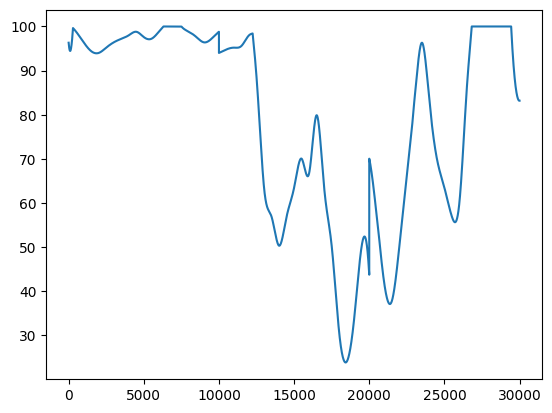

In [728]:
combine_df['production_rate_series3'].plot()

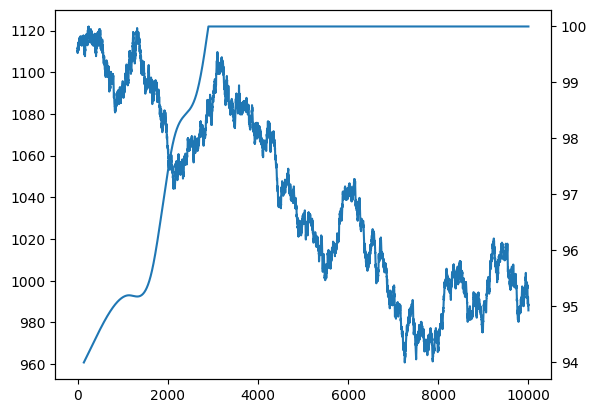

In [738]:
fig, ax1 = plt.subplots()

ax1.plot(range(len(combine_df[combine_df['DAY']==0]['ORCHIDS'])), 
         combine_df[combine_df['DAY']==0]['ORCHIDS'])
ax2 = ax1.twinx()
ax2.plot(range(len(combine_df[combine_df['DAY']==0]['production_rate_series'])), 
         combine_df[combine_df['DAY']==0]['production_rate_series'].shift(140))

In [733]:
X = combine_df[combine_df['DAY']==1]['production_rate_series3']
# X = production_rate_series[10000:]
y = combine_df[combine_df['DAY']==1]['ORCHIDS']
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

In [734]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ORCHIDS   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     4259.
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:12:46   Log-Likelihood:                -46127.
No. Observations:               10001   AIC:                         9.226e+04
Df Residuals:                    9999   BIC:                         9.227e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1119.4579      0.931   1202.038      0.000    1117.632    1121.283
production_rate_series3    -0.7700      0.012    -65.262      0.000      -0.793      -0.747
==============================================================================
Omnibus:                     1416.025   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              516.641
Skew:                           0.342   Prob(JB):                    6.50e-113
Kurtosis:                       2.122   Cond. No.                         302.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# UPDATE SUNLIGHT TS DATA EVERY ROUND

In [ ]:
sunlight_historical_ts = combine_df[combine_df['DAY']==1]['SUNLIGHT']

sufficient_sunlight_day1 = [('1' if s >= 2500 else '0') for s in combine_df[combine_df['DAY']==1]['SUNLIGHT']]
sufficient_sunlight_day1_bin = ''.join(sufficient_sunlight_day1)[1:]
# hex_num = hex(int(''.join(sufficient_sunlight_day1),2)).zfill((len(sufficient_sunlight_day1_bin) + 3) // 4)

hd = (len(sufficient_sunlight_day1_bin) + 3)// 4
hex_num = '%.*x' % (hd, int('0b'+sufficient_sunlight_day1_bin, 0))

return_bin = bin(int(hex_num, 16))[2:].zfill(len(hex_num)*4)

# Price directional prediction

In [939]:
day1 = combine_df[combine_df['DAY']==-1]
day2 = combine_df[combine_df['DAY']==-0]
day3 = combine_df[combine_df['DAY']==-1]

In [984]:
def humidity_diff(x):
    if x > 80:
        return (x-80)/5*2
    elif x < 60:
        return (60-x)/5*2

    return 0

feature_df = pd.DataFrame()
target_df = day1
feature_df['humidity_diff'] = target_df['HUMIDITY'].apply(humidity_diff)
feature_df['orchid_diff'] = target_df['ORCHIDS'].shift(-1) - target_df['ORCHIDS']
feature_df['orchid_class'] = np.where(feature_df['orchid_diff']>0, 2, 
                                      np.where(feature_df['orchid_diff']<0, 0, 1))
feature_df['sunlight_change'] = target_df['SUNLIGHT'].shift(-1)-target_df['SUNLIGHT']


In [985]:
feature_df['humidity_diff'].shift(-1)

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
9996     1.207720
9997     1.205142
9998     1.202570
9999     1.200000
10000         NaN
Name: humidity_diff, Length: 10001, dtype: float64

In [986]:
humidity_diff_outclass = feature_df['humidity_diff'].shift(-1) - feature_df['humidity_diff']
feature_df['humidity_class_signal'] = np.where(humidity_diff_outclass>0, 2,
         np.where(humidity_diff_outclass<0, 0,1))

In [987]:
cm = confusion_matrix(feature_df['orchid_class'], feature_df['humidity_class_signal'] )
cm

array([[1805,  560, 1646],
       [ 943,  277,  776],
       [1754,  538, 1702]])

In [988]:
from sklearn.linear_model import LogisticRegression

# Assuming you have your feature matrix X and target variable y
model = LogisticRegression()

X = feature_df.drop(['orchid_diff','orchid_class'],axis=1)[:-1]
y = feature_df['orchid_class'][:-1]

X_train = X.iloc[:int(len(X)//1.25)]
y_train = y[:int(len(X)//1.25)]
X_test = X.iloc[int(len(X)//1.25):]
y_test = y[int(len(X)//1.25):]

model.fit(X_train, y_train)

LogisticRegression()

In [964]:
cm = confusion_matrix(y_test, model.predict(X_test))

In [965]:
cm

array([[480,   0, 315],
       [265,   0, 124],
       [496,   0, 320]])

In [961]:
model.predict(X_test)

array([2, 2, 2, ..., 0, 0, 0])

# R2 Log

In [937]:
log_file_path = 'R2.log'

# Open the log file in read mode
with open(log_file_path, 'r') as file:
    # Read the contents of the file
    log_contents = file.read()

trade_history = json.loads(log_contents)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
                                'SUNLIGHT_ts': "00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001f000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000003ffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000", 
